# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
coord = []
humidity = []
wind = []
clouds = []
temp = []
date = []
lat = []
speed = []
lon = []
now = datetime.datetime.now()

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



628


In [7]:
cities

['illoqqortoormiut',
 'aykhal',
 'hermanus',
 'boralday',
 'cape town',
 'ushuaia',
 'dwarka',
 'otradnoye',
 'port lincoln',
 'jamestown',
 'ibra',
 'belushya guba',
 'mar del plata',
 'cidreira',
 'nizhneyansk',
 'busselton',
 'barrow',
 'porto velho',
 'bluff',
 'yeniseysk',
 'mataura',
 'hilo',
 'oyama',
 'bredasdorp',
 'lagoa',
 'khatanga',
 'georgetown',
 'sorvag',
 'fangshan',
 'puerto ayora',
 'new norfolk',
 'luderitz',
 'bambous virieux',
 'ribeira grande',
 'charters towers',
 'amderma',
 'padre bernardo',
 'great falls',
 'albany',
 'rikitea',
 'pangody',
 'salinas',
 'gigmoto',
 'elat',
 'magadan',
 'dikson',
 'arraial do cabo',
 'tuktoyaktuk',
 'westport',
 'attawapiskat',
 'natalio',
 'lavrentiya',
 'kodiak',
 'saskylakh',
 'alihe',
 'kohima',
 'mount isa',
 'airai',
 'nikolskoye',
 'qaanaaq',
 'butaritari',
 'kaitangata',
 'ranfurly',
 'upernavik',
 'san jose',
 'tasiilaq',
 'komsomolskiy',
 'punta arenas',
 'mayor pablo lagerenza',
 'hay river',
 'klaksvik',
 'rungata'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Identify type of units
units = "imperial"

#create query url and get response from api
query_url = f"{base_url}appid={api_key}&units={units}&q="

#loop through cities
for city in cities:
   # record_count+=1
    try:
        response=requests.get(query_url + city).json()
        wind.append(response["wind"]["speed"])
        temp.append(response["main"]["temp"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        #print(json.dumps(response, indent=4, sort_keys=True))
        #print(f"query record {record_count}, Response Status code:{response.status_code} for City :{city}")
        
    except:
        print("skipping.... City Not found")
        #response response.json()
        #pprint(response)
        
print(f'The temperature information received is: {temp}')
print(f'The latitude information received is: {lat}')
print(f'The humidity information received is: {humidity}')
print(f'The wind information received is: {wind}')
print(f'The clouds information received is: {clouds}')


skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City Not found
skipping.... City No

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
#create dictionary and dataframe with city as the index
data = {'Cities':[city],
        "Latitude":[lat], 
        "Temperature":[temp], 
        "Humidity":[humidity], 
        "Wind Speed": [wind], 
        "Clouds": [clouds]}
df = pd.DataFrame(data)
df.head()

,Cities,Latitude,Temperature,Humidity,Wind Speed,Clouds
0,kotaparh,"[65.95, -34.42, 43.36, -33.93, -54.81, 28.58, ...","[18.54, 66.33, 28.4, 65.35, 42.8, 51.8, 12.54,...","[82, 83, 100, 88, 75, 93, 78, 90, 84, 88, 54, ...","[7.74, 7, 2.24, 5.82, 21.92, 4.7, 15.66, 15.01...","[76, 0, 75, 0, 20, 0, 36, 68, 8, 0, 76, 76, 48..."


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

ValueError: setting an array element with a sequence.

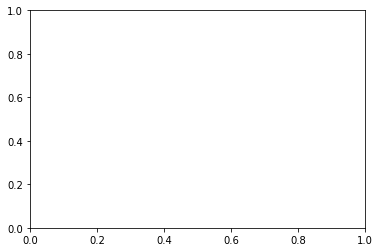

In [49]:
#Create scatter plot
plt.scatter(df["Latitude"], df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

#Show graph
plt.show()

#### Latitude vs. Humidity Plot

ValueError: setting an array element with a sequence.

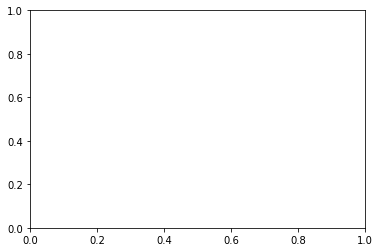

In [50]:
#Create scatter plot
plt.scatter(df["Latitude"], df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Show graph
plt.show()

#### Latitude vs. Cloudiness Plot

ValueError: setting an array element with a sequence.

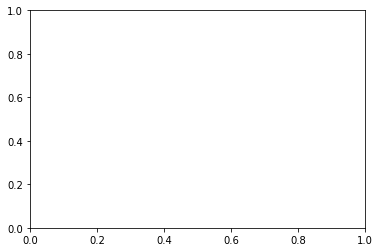

In [51]:
#Create scatter plot
plt.scatter(df["Latitude"], df["Clouds"])

# Incorporate the other graph properties
plt.title("Latitude vs. Clouds")
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.grid(True)

#Show graph
plt.show()

#### Latitude vs. Wind Speed Plot

ValueError: setting an array element with a sequence.

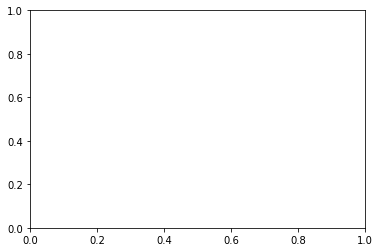

In [52]:
#Create scatter plot
plt.scatter(df["Latitude"], df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Show graph
plt.show()